# MI2 - ES09: K-means clustering
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [10]:
# Load data
data = np.loadtxt("cluster.dat")
means = data.mean(axis=1)

In [94]:
# Parameters
Ks = np.arange(2,9) #No. of clusters
tmax = 5

In [72]:
# Initialization
#for k in K:
k = 4

In [190]:
def k_means_batch(data, Ks=Ks, tmax=tmax):
    # Optimization
    k_Ws = []
    k_clusters = []
    k_Es = []

    for k in Ks:
        #print(k)
        Ws = np.zeros((tmax+1, k, 2))
        Ws[0] = np.random.normal(means, size=(k,2))
        clusters = np.zeros((tmax, data.shape[1]))
        Es = np.zeros(tmax)

        for t in range(tmax):
            dist = euclidean_distances(data.T, Ws[t])
            clusters[t] = dist.argmin(axis=1)
            ms = np.zeros((data.shape[1],k))

            for i, v in enumerate(clusters[t]):
                ms[i,v] = 1
            #print(np.sum(ms, axis=0))
            w = np.dot(ms.T, data.T)/np.sum(ms, axis=0).reshape(k,1)
            # Some clusters don't have data, restore them
            w[np.isnan(w)] = Ws[t, np.isnan(w)]
            Ws[t+1] = w
            # Erros
            Es[t] = np.sum(np.multiply(ms, dist**2)) / (2*data.shape[1])
        k_Ws.append(Ws)
        k_clusters.append(clusters)
        k_Es.append(Es)
    return k_Ws, k_clusters, k_Es

In [191]:
k_Ws, k_clusters, k_Es = k_means_batch(data)

/System/Library/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/System/Library/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


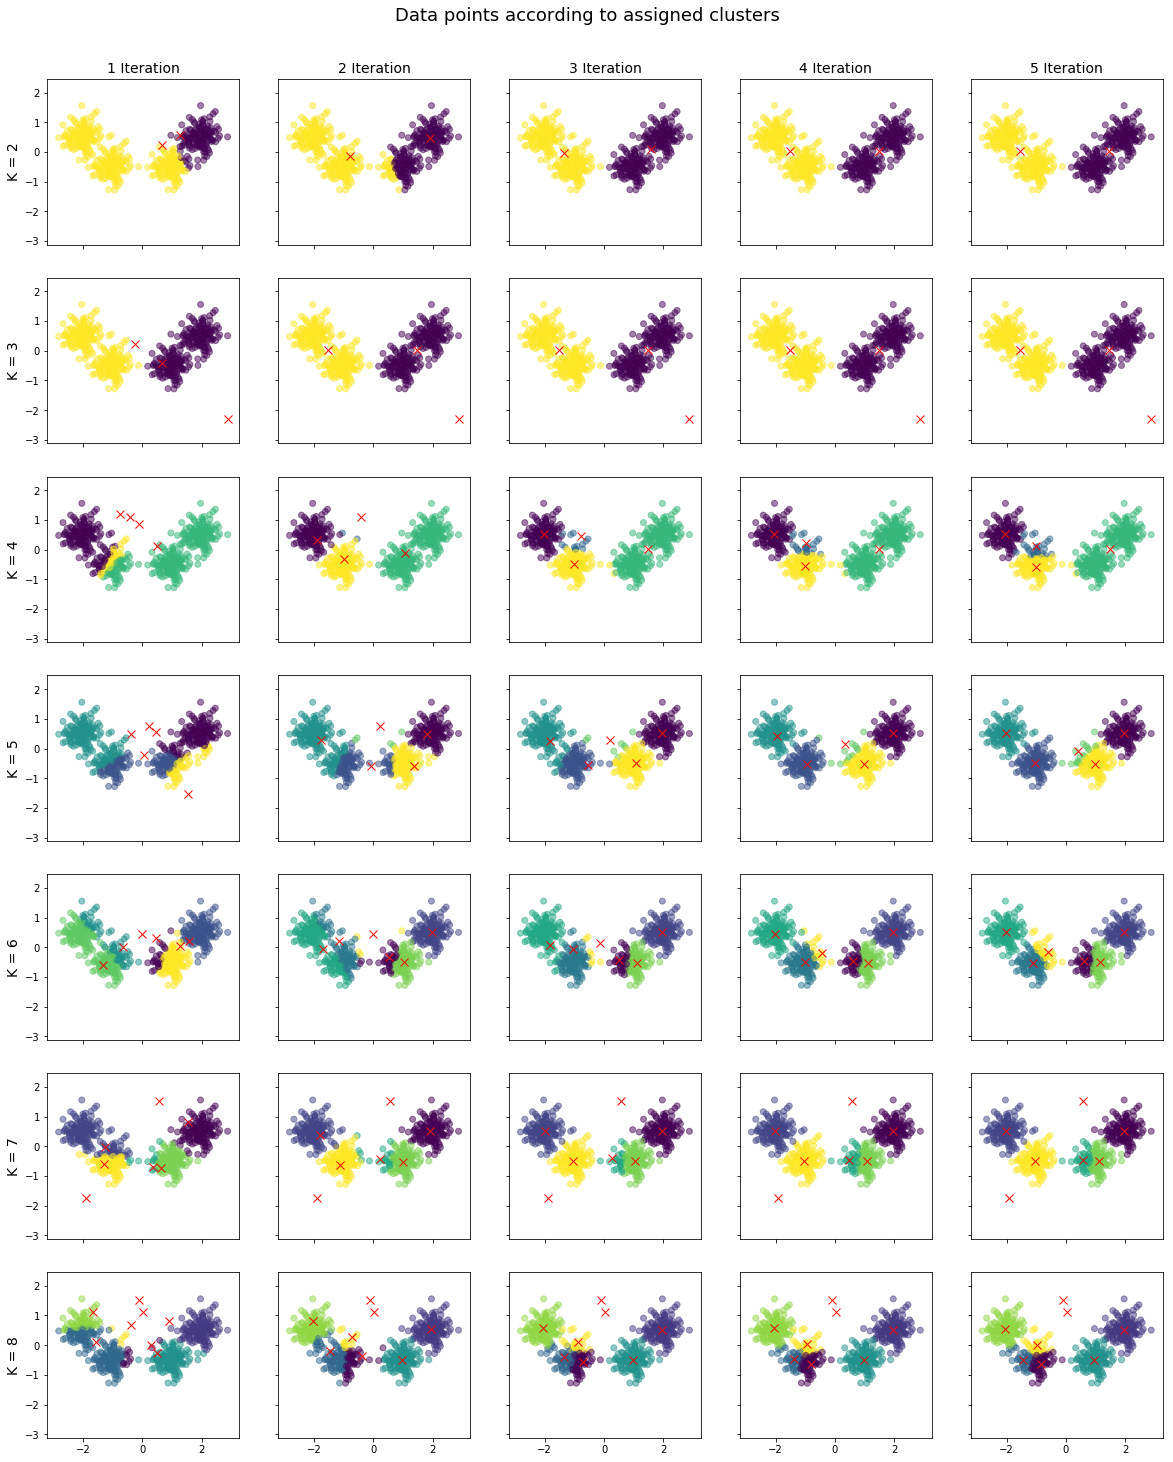

In [192]:
# Visualize
f, axes = plt.subplots(len(Ks), tmax, sharex=True, sharey=True, figsize=(20,25))
f.suptitle("Data points according to assigned clusters", size=18, y=0.92)
for i in range(len(Ks)):
    axes[i,0].set_ylabel("K = %i" %Ks[i], size=14)
    for j in range(tmax):
        axes[i,j].scatter(data[0], data[1], c=k_clusters[i][j], alpha=0.5)
        axes[i,j].plot(k_Ws[i][j][:,0], k_Ws[i][j][:,1], ".", marker="x", color="r", markersize=8)
        axes[i,j].axis('equal')
        axes[0,j].set_title("%i Iteration" %(j+1), size=14)

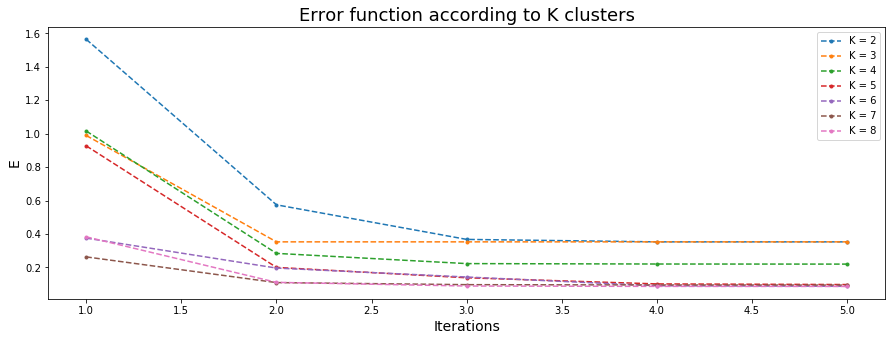

In [193]:
plt.figure(figsize=(15,5))
for i,E in enumerate(k_Es):
    plt.plot(range(1,tmax+1), E, ".--", label="K = %i" %Ks[i])
plt.title("Error function according to K clusters", size=18)
plt.xlabel("Iterations", size=14)
plt.ylabel("E", size=14)
plt.legend()
plt.show()

In [185]:
# New data points, meshgrid
x_min, x_max = data[0].min() - 1, data[0].max() + 1
y_min, y_max = data[1].min() - 1, data[1].max() + 1
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# predict the unseen data
# all points (px, py) on our grid in a nx2 matrix
query = np.c_[xx.ravel(), yy.ravel()].T
k_Ws_q, k_clusters_q, k_Es_q = k_means_batch(query)
#k_clusters_q = k_clusters_q.reshape(xx.shape[0], xx.shape[1])

/System/Library/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


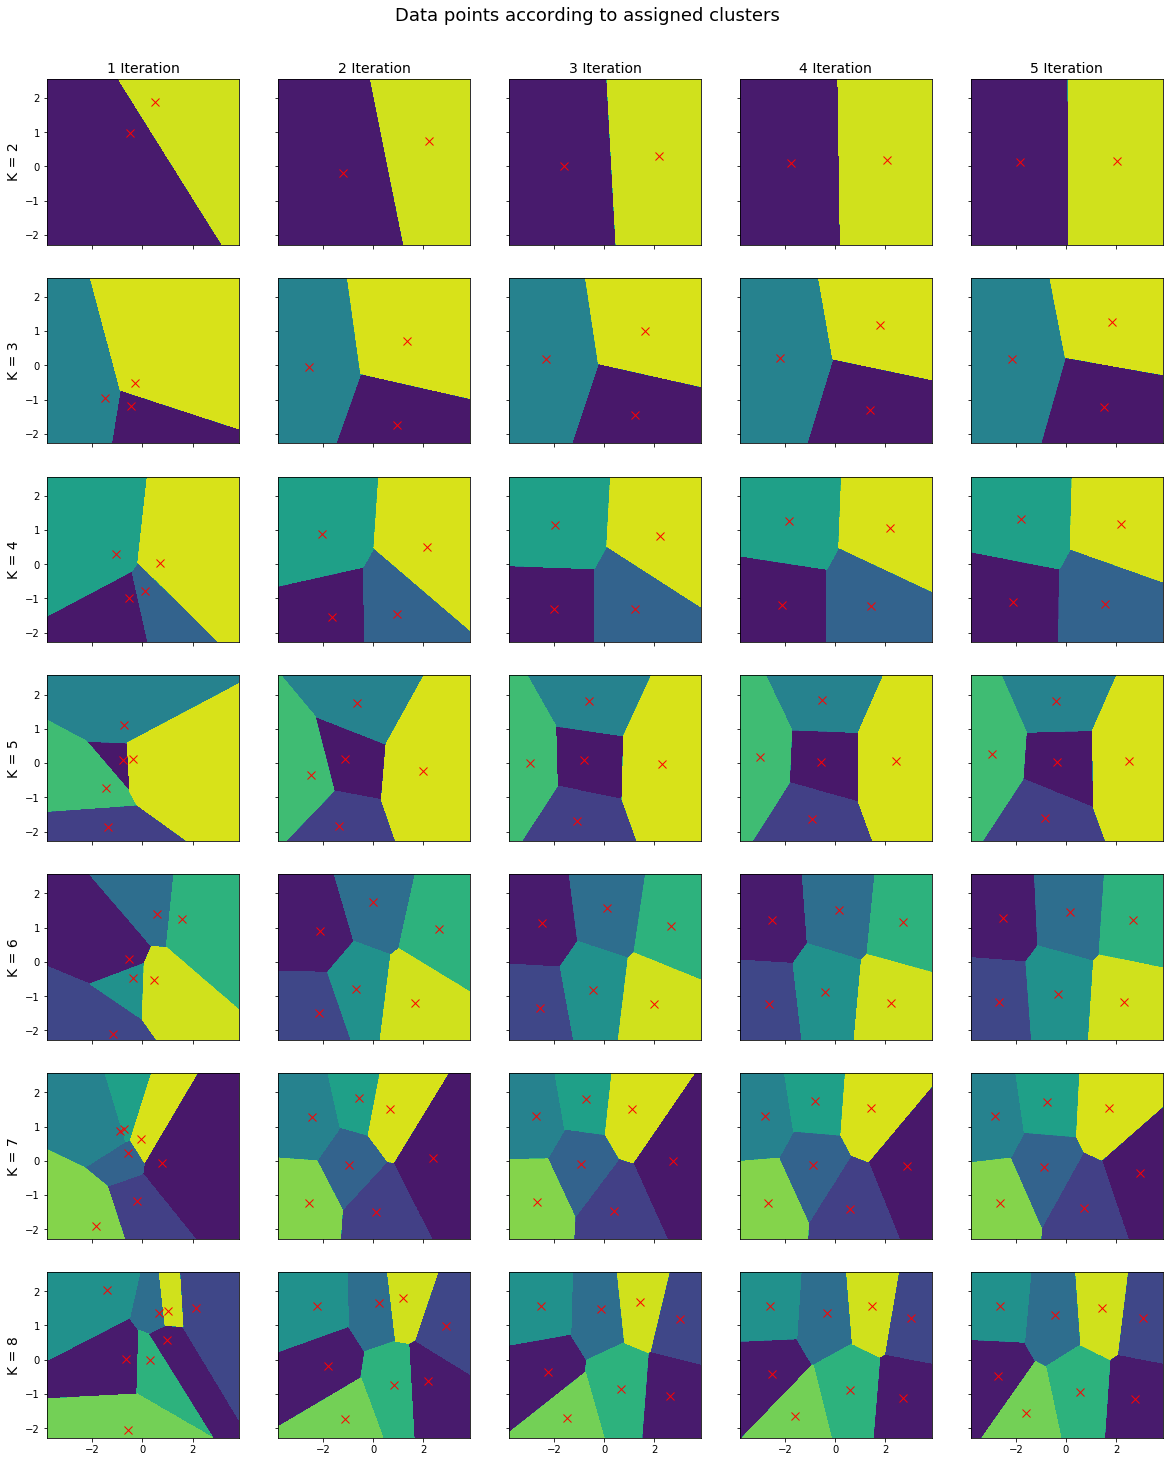

In [187]:
# Visualize
f, axes = plt.subplots(len(Ks), tmax, sharex=True, sharey=True, figsize=(20,25))
f.suptitle("Data points according to assigned clusters", size=18, y=0.92)
for i in range(len(Ks)):
    axes[i,0].set_ylabel("K = %i" %Ks[i], size=14)
    for j in range(tmax):
        axes[i,j].contourf(xx, yy, k_clusters_q[i][j].reshape(xx.shape[0], xx.shape[1]))#, vmin=vmin, vmax=vmax)
        axes[i,j].plot(k_Ws_q[i][j][:,0], k_Ws_q[i][j][:,1], ".", marker="x", color="r", markersize=8)
        #axes[i,j].axis('equal')
        axes[0,j].set_title("%i Iteration" %(j+1), size=14)

## 9.2. Online K-means Clustering

In [239]:
def k_means_online(data, eta0=eta0, tau=tau, k=k):
    tmax = data.shape[1]

    Ws = np.zeros((tmax+1, k, 2))
    Ws[0] = np.random.normal(means, size=(k,2))
    
    etas = np.zeros(tmax+1)
    etas[0] = eta0
    
    clusters = np.zeros((tmax))
    Es = np.zeros(tmax)

    for t in range(tmax):
        if t <= tmax/4: 
            etas[t] = eta0 
        else: 
            etas[t] = etas[t-1] * tau
            
        dist = euclidean_distances(data[:,t].reshape(1,2), Ws[t])
        clusters[t] = dist.argmin(axis=1)
        delta_w = etas[t]*(data[:,t] - Ws[t])
        Ws[t+1] = Ws[t] + delta_w
        # Erros
        Es[t] = np.sum(dist**2) / 2

    return Ws, clusters, Es

In [259]:
eta0 = 0.001
k = 4
tau = 0.5
Ws_o, clusters_o, Es_o = k_means_online(data)

/System/Library/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/System/Library/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/System/Library/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


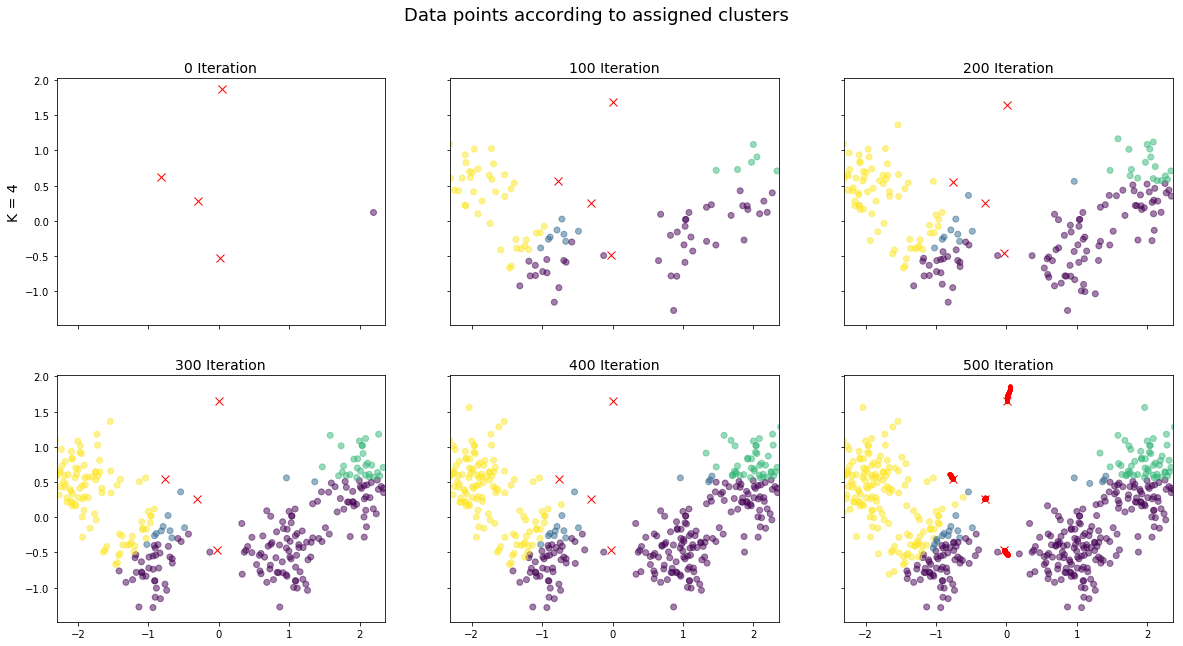

In [263]:
# Visualize
f, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20,10))
axes = axes.ravel()
f.suptitle("Data points according to assigned clusters", size=18, y=0.98)
axes[0].set_ylabel("K = %i" %k, size=14)
for j, idx in enumerate(np.linspace(0, data.shape[1], 6)):
    c = -1 * np.ones(data.shape[1])
    c[:idx+1] = clusters_o[:idx+1]
    axes[j].scatter(data[0,:idx+1], data[1,:idx+1], c=c[:idx+1], alpha=0.5)
    axes[j].plot(Ws_o[idx][:,0], Ws_o[idx][:,1], ".", marker="x", color="r", markersize=8)
    axes[j].axis('equal')
    axes[j].set_title("%i Iteration" %(idx), size=14)
for w in range(4):
    axes[j].plot(Ws_o[:,w,0], Ws_o[:,w,1], ".-r", label="W%s" %w)

In [248]:
Es_o.shape

(500,)

/System/Library/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


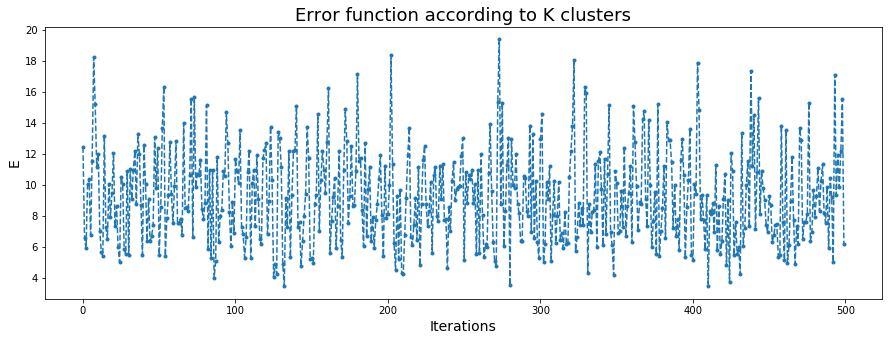

In [252]:
plt.figure(figsize=(15,5))
plt.plot(Es_o, ".--")
plt.title("Error function according to K clusters", size=18)
plt.xlabel("Iterations", size=14)
plt.ylabel("E", size=14)
plt.legend()
plt.show()